In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data/Real_Data/Real_Combine.csv")

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
df.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [5]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [6]:
df.shape

(731, 9)

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [9]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


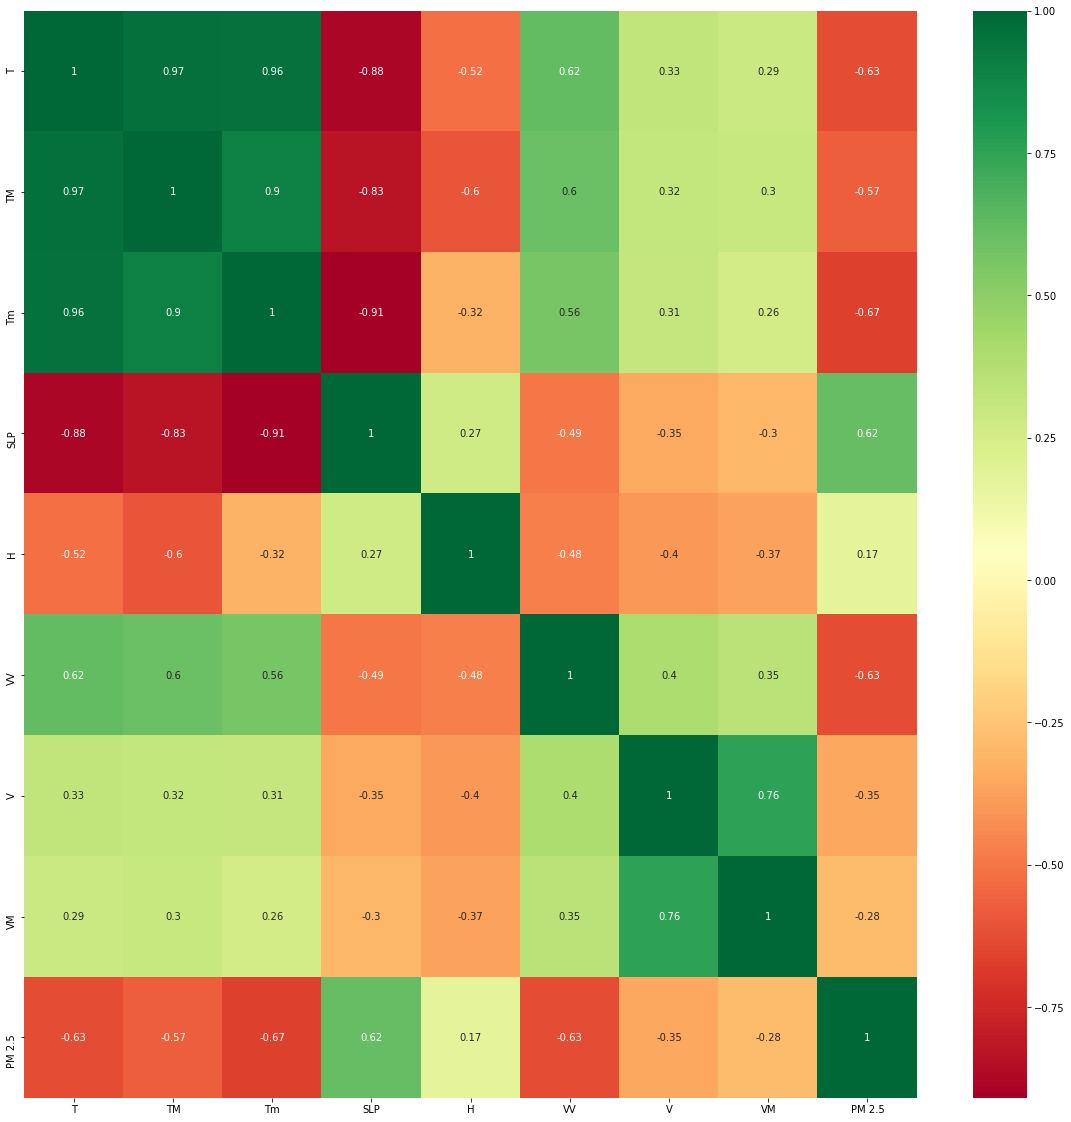

In [10]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

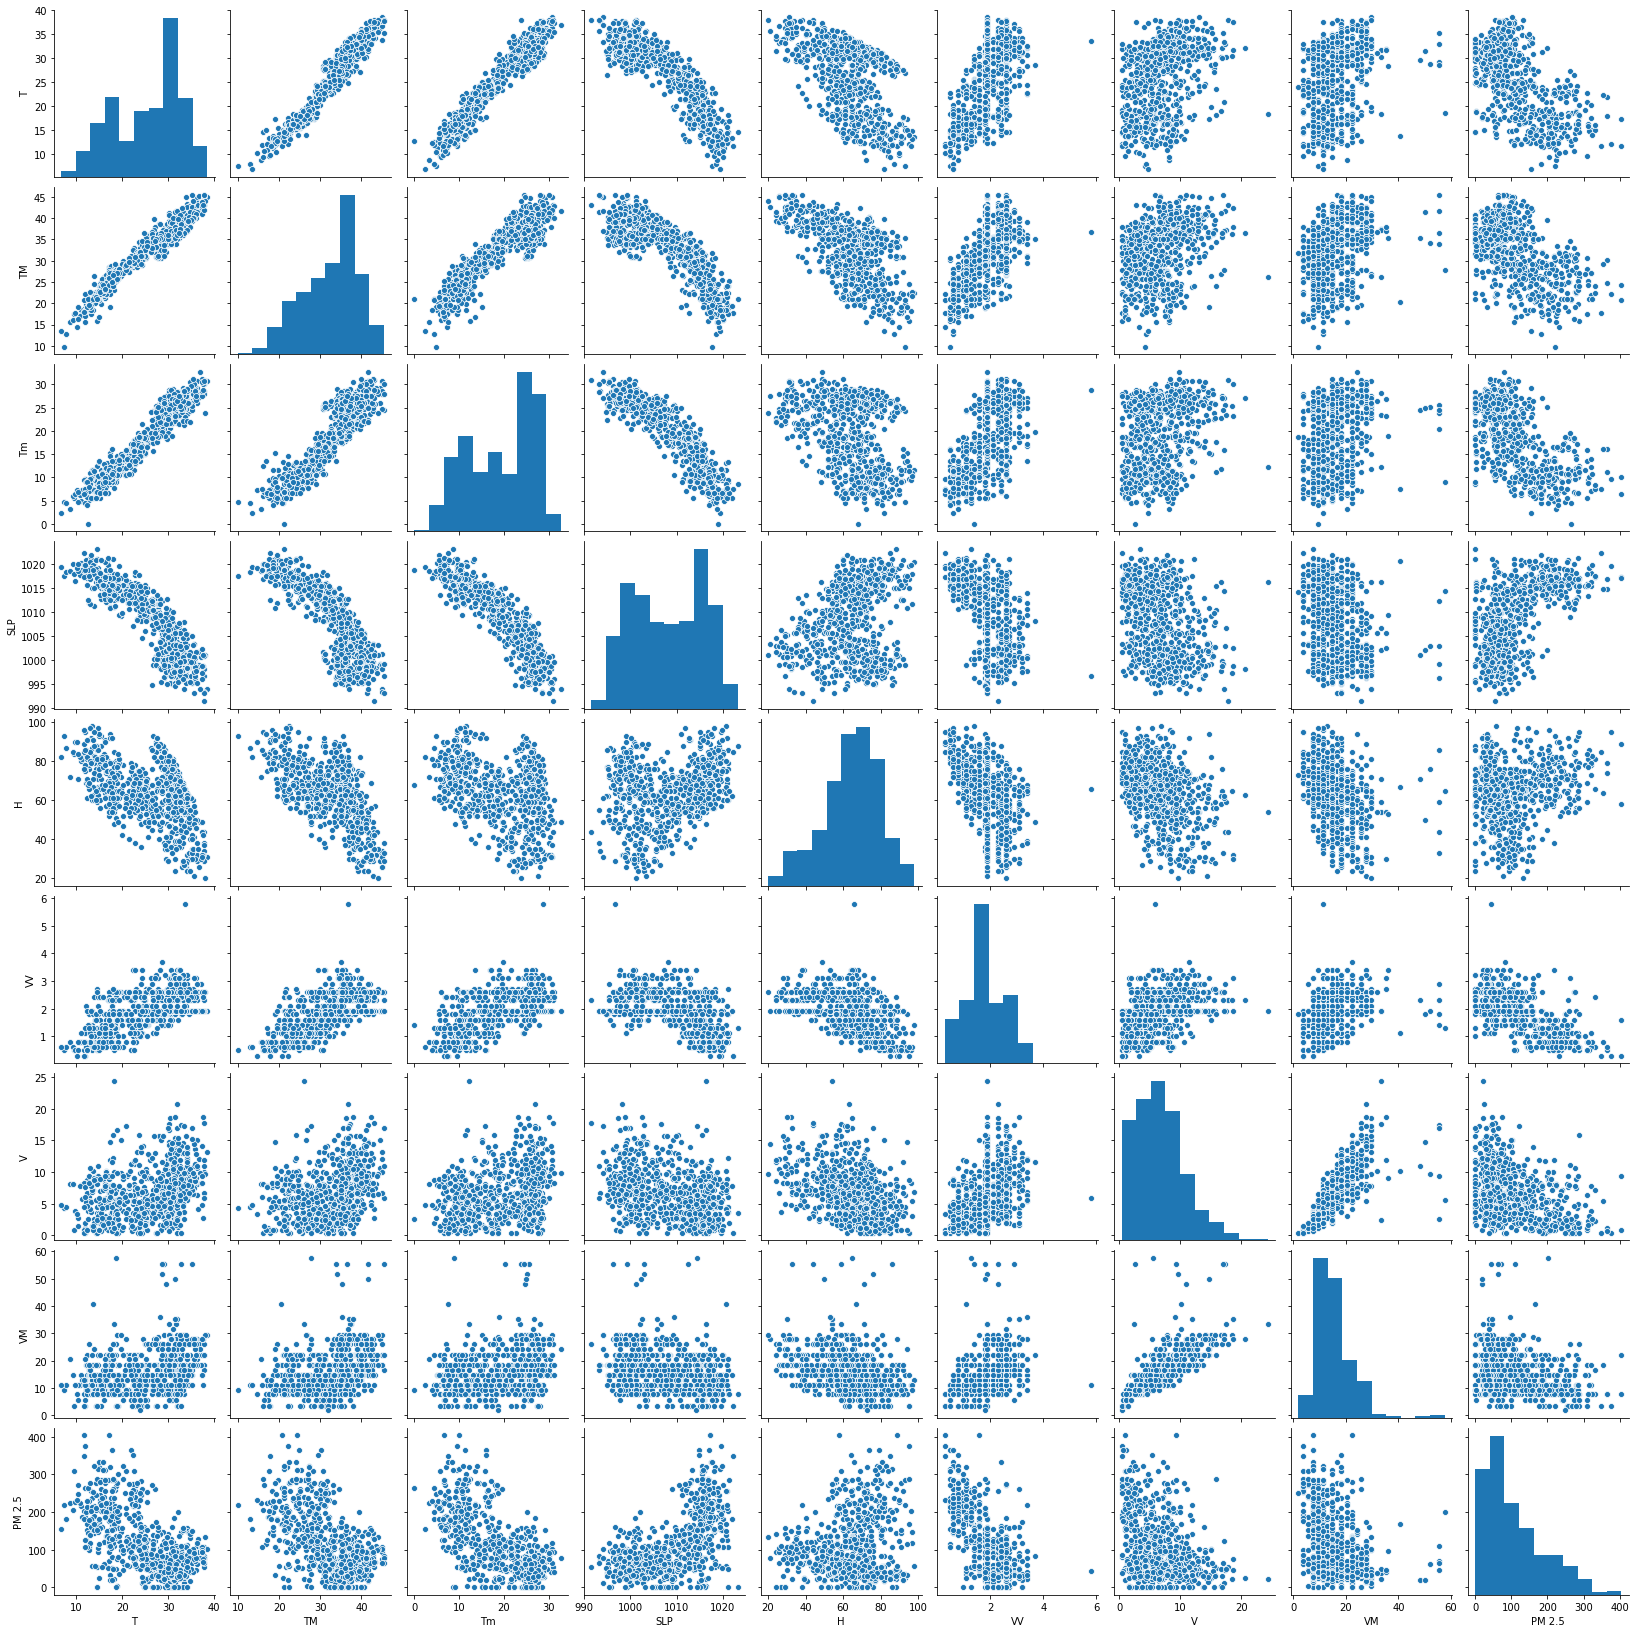

In [11]:
sns.pairplot(df)

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
y.head()


0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM 2.5, dtype: float64

In [14]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [15]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [16]:
print(model.feature_importances_)

[0.17853854 0.07948403 0.16772337 0.14155866 0.08224875 0.25846628
 0.05416211 0.03781826]


In [17]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


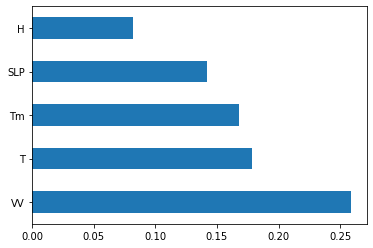

In [18]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

<AxesSubplot:xlabel='PM 2.5'>

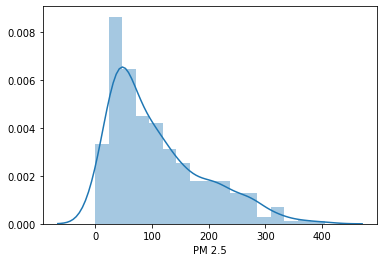

In [19]:
sns.distplot(y)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [45]:
from sklearn.neighbors import KNeighborsRegressor

In [46]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [47]:
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor()

In [48]:
print("coefficient of determination R^2 in traning set {}".format(knn_regressor.score(X_train,y_train)))

coefficient of determination R^2 in traning set 0.6573106554627679


In [49]:
print("coefficient of determination R^2 in training set {}".format(knn_regressor.score(X_test,y_test)))

coefficient of determination R^2 in training set 0.42893663300486007


In [50]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn_regressor,X,y,cv=5)
score

array([0.15854802, 0.06940042, 0.1594399 , 0.43800571, 0.38244632])

In [51]:
score.mean()

0.24156807428436422

In [52]:
prediction = knn_regressor.predict(X_test)

<AxesSubplot:xlabel='PM 2.5'>

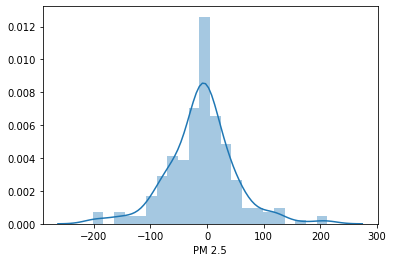

In [53]:
sns.distplot(y_test-prediction)

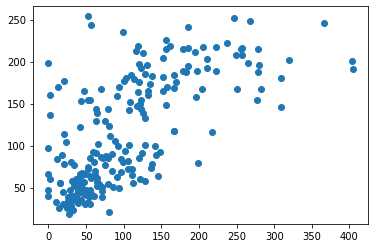

In [54]:
plt.scatter(y_test,prediction)

In [55]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 43.24392694063928
MSE: 3727.9895114091833
RMSE: 61.05726419853074


In [35]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(knn,X,y,cv=10,scoring='neg_mean_squared_error')
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

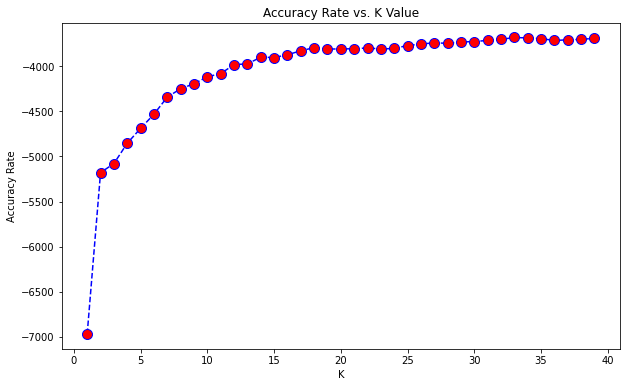

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [39]:
knn = KNeighborsRegressor(n_neighbors=34)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=34)

In [41]:
predictions = knn.predict(X_test)

In [42]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 41.418611782612594
MSE: 3575.279777400415
RMSE: 59.79364328589131


In [56]:
import pickle
file = open('knn_regressor.pkl', 'wb')
pickle.dump(knn,file)